In [311]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

In [313]:
diabete_db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [314]:
diabete_db.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [315]:
diabete_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [316]:
feactures=diabete_db.columns.drop('Outcome')
feactures

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [317]:
#replace values equal to 0 with nan
columns_value_0=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for col in columns_value_0:
  diabete_db[col][diabete_db[col]==0]=np.NaN
diabete_db.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [318]:
for col in columns_value_0:
  diabete_db[col].fillna(diabete_db[col].mean(),inplace=True )
diabete_db.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

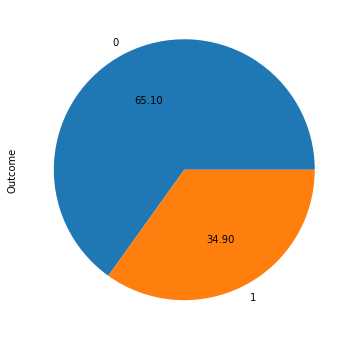

In [319]:
plt.figure(figsize=(6,6))
diabete_db["Outcome"].value_counts(normalize=True).plot.pie(autopct="%.2f")
plt.show()

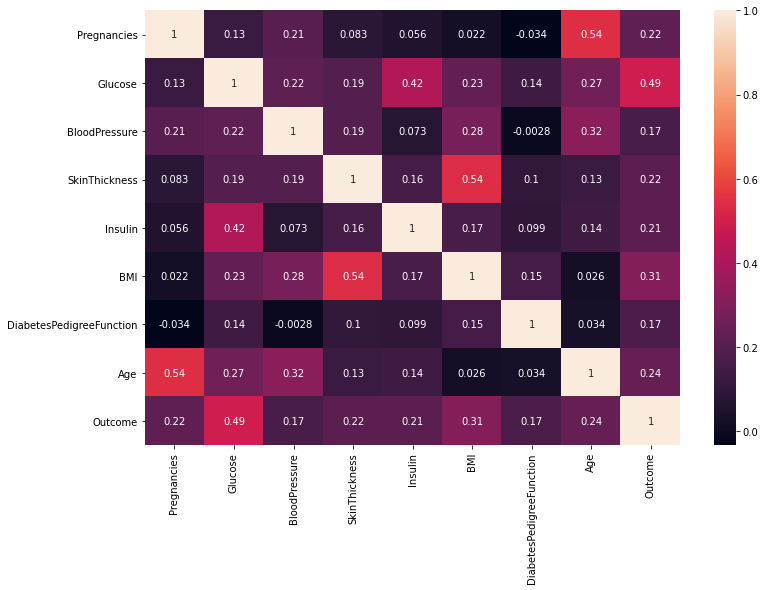

In [320]:
plt.figure(figsize=(12,8))
corrMatrix = diabete_db.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [321]:
#Dataframe spliting process
X=diabete_db.drop("Outcome",axis=1).values
y=diabete_db['Outcome']

In [322]:
#standarisation of the series
from sklearn.preprocessing import StandardScaler
standard=StandardScaler()
X_s=standard.fit_transform(X)

In [323]:
rs = 0
cv = 5
#split of the feactures
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_s,y, test_size=0.10, random_state=rs)

In [324]:
#base line
from sklearn.linear_model import  LogisticRegression

model=LogisticRegression()
model.fit(X_train,y_train)
y_preds=model.predict(X_test)

In [325]:
# evaluation of the model
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

print(f"accuracy: {accuracy_score(y_test,y_preds)}, precision: {precision_score(y_test,y_preds)}, recall: {recall_score(y_test,y_preds)}, f1_score: {f1_score(y_test,y_preds)}")

accuracy: 0.8571428571428571, precision: 0.8260869565217391, recall: 0.7307692307692307, f1_score: 0.7755102040816326


In [326]:
importante=model.coef_[0]
for i,col in enumerate(feactures):
  print(f"{col} : {importante[i]}")

Pregnancies : 0.41181518531319616
Glucose : 1.0855239480446994
BloodPressure : -0.12994630578861574
SkinThickness : 0.01024487989808192
Insulin : -0.0718965934088436
BMI : 0.6410962872008397
DiabetesPedigreeFunction : 0.3261497858871592
Age : 0.18796341599104152


In [327]:
from sklearn.linear_model import LogisticRegressionCV

#train model
model=LogisticRegressionCV(cv=cv, scoring="recall")
model.fit(X_train_,y_train_)
y_preds=model.predict(X_test_)
#metrics score
print(f"accuracy: {accuracy_score(y_test_,y_preds)}, precision: {precision_score(y_test_,y_preds)}, recall: {recall_score(y_test_,y_preds)}, f1_score: {f1_score(y_test_,y_preds)}")

accuracy: 0.7987012987012987, precision: 0.7105263157894737, recall: 0.574468085106383, f1_score: 0.6352941176470589


In [328]:
from sklearn.naive_bayes import GaussianNB
model_gnb=GaussianNB()
model_gnb.fit(X_train,y_train)
y_preds=model_gnb.predict(X_test)

print(f"accuracy: {accuracy_score(y_test,y_preds)}, precision: {precision_score(y_test,y_preds)}, recall: {recall_score(y_test,y_preds)}, f1_score: {f1_score(y_test,y_preds)}")

accuracy: 0.8311688311688312, precision: 0.76, recall: 0.7307692307692307, f1_score: 0.7450980392156863


In [329]:
#best recall to take
from sklearn.ensemble import RandomForestClassifier

model_rf=RandomForestClassifier( random_state=rs)
model_rf.fit(X_train,y_train)
y_preds=model_rf.predict(X_test)

print(f"accuracy: {accuracy_score(y_test,y_preds)}, precision: {precision_score(y_test,y_preds)}, recall: {recall_score(y_test,y_preds)}, f1_score: {f1_score(y_test,y_preds)}")

accuracy: 0.7792207792207793, precision: 0.6956521739130435, recall: 0.6153846153846154, f1_score: 0.6530612244897959


In [330]:
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
y_preds=model_dt.predict(X_test)

print(f"accuracy: {accuracy_score(y_test,y_preds)}, precision: {precision_score(y_test,y_preds)}, recall: {recall_score(y_test,y_preds)}, f1_score: {f1_score(y_test,y_preds)}")

accuracy: 0.7402597402597403, precision: 0.6, recall: 0.6923076923076923, f1_score: 0.6428571428571429


In [331]:
##*good model****
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
model_lr=LogisticRegressionCV(cv=cv, scoring="recall")
model_ng=GaussianNB()
model_fc=RandomForestClassifier( random_state=rs)

model_vote=VotingClassifier(estimators=[('lr',model_lr),('ng',model_ng),('fc',model_fc)])
model_vote.fit(X_train,y_train)
y_preds=model_vote.predict(X_test)
print(f"accuracy: {accuracy_score(y_test,y_preds)}, precision: {precision_score(y_test,y_preds)}, recall: {recall_score(y_test,y_preds)}, f1_score: {f1_score(y_test,y_preds)}")

accuracy: 0.8441558441558441, precision: 0.7916666666666666, recall: 0.7307692307692307, f1_score: 0.76


## save and load file:
https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

In [332]:
import pickle

## save the model to disk
m_save = model_vote
filename = 'model_rf.hd5'
pickle.dump(m_save, open(filename, 'wb'))

In [333]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [334]:
y_preds=loaded_model.predict(X_test)

print(f"accuracy: {accuracy_score(y_test,y_preds)}, precision: {precision_score(y_test,y_preds)}, recall: {recall_score(y_test,y_preds)}, f1_score: {f1_score(y_test,y_preds)}")

accuracy: 0.8441558441558441, precision: 0.7916666666666666, recall: 0.7307692307692307, f1_score: 0.76


In [335]:
_y_preds=loaded_model.predict(X_train)

print(f"accuracy: {accuracy_score(y_train,_y_preds)}, precision: {precision_score(y_train,_y_preds)}, recall: {recall_score(y_train,_y_preds)}, f1_score: {f1_score(y_train,_y_preds)}")

accuracy: 0.7973950795947902, precision: 0.7475728155339806, recall: 0.6363636363636364, f1_score: 0.6875
